<a href="https://colab.research.google.com/github/shahchayan9/Clustering/blob/main/Clustering_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install TSLearn
!pip install tslearn -q
!pip install matplotlib -q
!pip install numpy -q
!pip install pandas -q
!pip install scikit-learn -q


In [ ]:
# Step 2: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [ ]:
# Step 3: Generate Synthetic Time Series Data
def generate_synthetic_data(num_series=100, num_points=50):
    np.random.seed(42)
    data = []
    for _ in range(num_series):
        trend = np.random.choice([0.1, -0.1])
        seasonality = np.sin(np.linspace(0, 2 * np.pi, num_points))
        noise = np.random.normal(0, 0.1, num_points)
        series = trend * np.arange(num_points) + seasonality + noise
        data.append(series)
    return np.array(data)

time_series_data = generate_synthetic_data()


In [ ]:
# Step 4: Format Data for TSLearn
time_series_dataset = to_time_series_dataset(time_series_data)

In [ ]:
# Step 5: Perform Clustering Using K-Means
num_clusters = 3
model = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", random_state=42)
cluster_labels = model.fit_predict(time_series_dataset)


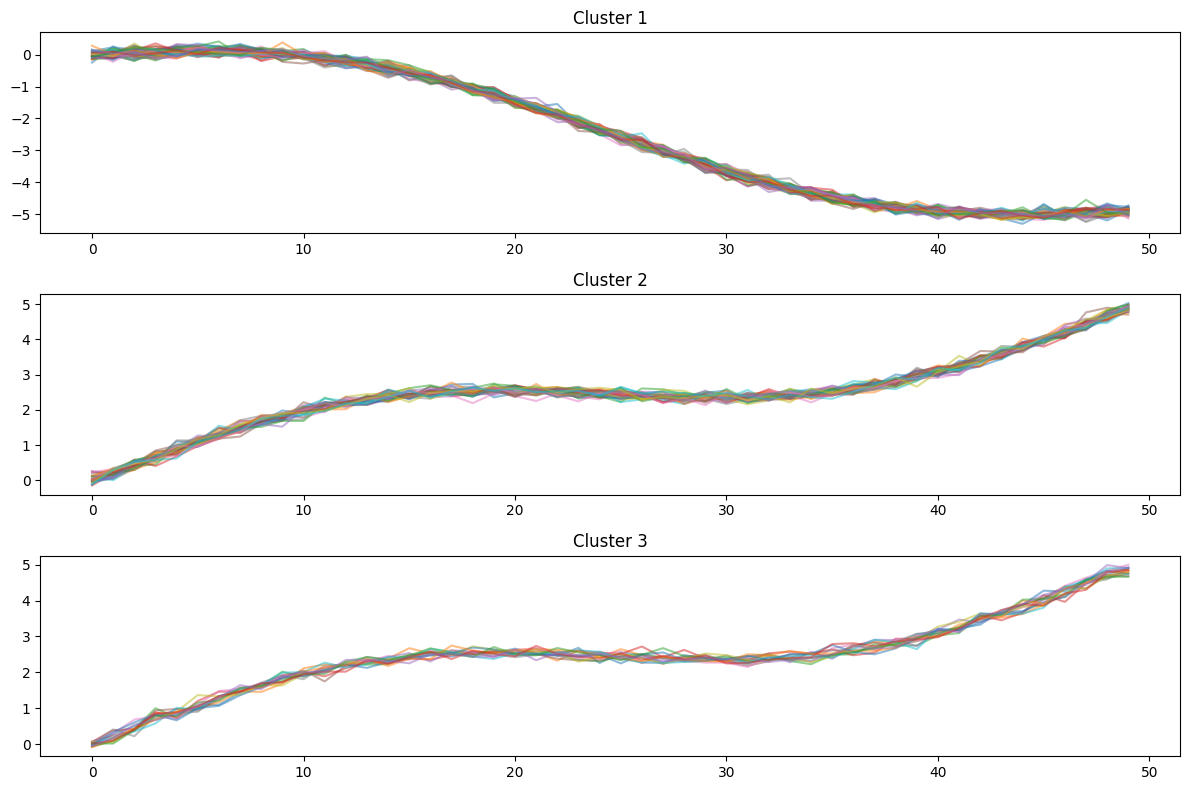

In [ ]:
# Step 6: Visualize Clusters
plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    plt.subplot(num_clusters, 1, cluster + 1)
    cluster_indices = np.where(cluster_labels == cluster)[0]
    for idx in cluster_indices:
        plt.plot(time_series_data[idx], alpha=0.5)
    plt.title(f'Cluster {cluster + 1}')
plt.tight_layout()
plt.show()
